# eCommerce Marketing Data Exploration and Analysis

The following data exploration and analysis is of a marketing data set given in a business analytics course. This exploration and analysis consists of three sections:

-Data cleansing and feature engineering

-Statistical analysis and exloration

-Data Visualization and summary of findings

Thank you Dr. Omar Romero-Hernandez for providing this data set and making it available on Kaggle.com
https://www.kaggle.com/jackdaoud/marketing-data

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/jackdaoud/marketing-data' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: thomasmonahan01
Your Kaggle Key: ········


100%|██████████| 60.8k/60.8k [00:00<00:00, 6.90MB/s]

The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './marketing-data'

In [5]:
import os
os.listdir(data_dir)

['marketing_data.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "ecommerce-marketing-exploration-and-data-analysis" 

In [7]:
!pip install jovian --upgrade -q

## Data Preparation and Cleaning
The following are questions that will be answered in this section:
Are there any null values or outliers?
Are there any variables that warrant transformations? 
What useful variables can be engineered? 
Are there any patterns or anomalies in the data?

In [1]:
##Importing pandas and numpy
import pandas as pd
import numpy as np

In [2]:
## Importing visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
## Load csv into data frame
marketing_data_df = pd.read_csv('marketing-data/marketing_data.csv')

In [4]:
pd.set_option('display.max_columns', 28)
marketing_data_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND


Now that we have loaded in our data, lets check for null values before we take a closer look at individual variables.

In [5]:
marketing_data_df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

Our data set is pretty solid, however, we can see that there are 24 null values in the income column. Given that our data set contains information on 2,240 customers, our inclination may be to simply drop these values as they only account for 1.07% of the data. Lets take a closer look and see if we can't use some of the other column's data to help fill in our null values. Using some outside knowledge, there is a strong correlation between income and education. As such, we will 

In [6]:
marketing_data_df.loc[marketing_data_df[' Income '].isna()]  ##Important to note, our income column is actually entered as ' Income ', if we try to use 'Income' Python will return an error

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,3/2/14,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,7/11/13,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/12,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,4/1/13,39,187,5,65,26,20,14,2,4,2,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,5/27/14,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,1/12/14,49,5,1,9,2,0,4,1,1,0,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,5/18/13,52,375,42,48,94,66,96,7,4,10,4,3,0,0,0,0,0,0,0,AUS


In order to properly explore the relationship between education and income we need to temporarily remove the null values. To do this we will create a temporary data frame.

In [7]:
marketing_data_no_na_df = marketing_data_df.dropna()
marketing_data_no_na_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [8]:
marketing_data_no_na_df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
 Income                0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

Now that we have temporarily rid ourselves of the na values we need to clean up the Income column before we can explore its behavior. Recognize that our income column is not exclusively floats, instead we have $ and , that will prevent us from using seaborn to visualize the data. Lets get rid of those characters:

In [9]:
##Lets begin by removing the $ and the , by creating a new variable income float to store our new income column
income_float = marketing_data_no_na_df[' Income '].str.replace('$', '').str.replace(',', '').astype(float)
income_float

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name:  Income , Length: 2216, dtype: float64

As we can see from the income_float output, we have succesfully removed the '$' and ',' from our income values. Lets replace our original input column with this new colum.

In [10]:
marketing_data_no_na_df['income_float'] = income_float
marketing_data_no_na_df

<ipython-input-10-73a2612ae7b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_data_no_na_df['income_float'] = income_float


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,income_float
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,...,1,4,4,6,1,0,0,0,0,0,1,0,SP,84835.0
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,...,1,7,3,7,5,0,0,0,0,1,1,0,CA,57091.0
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,...,1,3,2,5,2,0,0,0,0,0,0,0,US,67267.0
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,...,1,1,0,2,7,0,0,0,0,0,0,0,AUS,32474.0
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,...,2,3,1,2,7,1,0,0,0,0,1,0,SP,21474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,18,126,47,48,...,2,5,2,11,4,0,0,0,0,0,0,0,US,66476.0
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,10,13,3,8,...,1,1,0,3,8,0,0,0,0,0,0,0,SP,31056.0
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,2,88,15,5,...,2,6,1,5,8,0,0,0,0,0,0,0,SP,46310.0
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,38,701,149,165,...,1,5,4,10,3,0,0,0,0,0,0,0,IND,65819.0


Now that we have succesfully converted our income data into a float in our new column "income_float" we can look at the relationship between income and education and start to make some inferences.

[Text(0.5, 0, 'Education'), Text(0, 0.5, 'Income')]

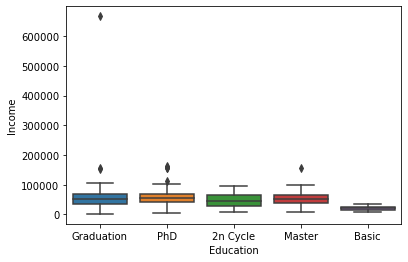

In [11]:
ax = sns.boxplot(x="Education", y="income_float", data=marketing_data_no_na_df)
ax.set(xlabel='Education', ylabel='Income')

As we can see from the plot boxplot above, there is an outlier in the graduation column that seems to be throwing of our data. Lets remove that value and then replot our data.

In [12]:
outlier = marketing_data_no_na_df.loc[marketing_data_no_na_df.income_float > 600000]
outlier

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,income_float
527,9432,1977,Graduation,Together,"$666,666.00",1,0,6/2/13,23,9,14,18,8,1,...,4,3,1,3,6,0,0,0,0,0,0,0,SA,666666.0


In [13]:
marketing_data_no_outlier_df = marketing_data_no_na_df.drop(index = 527)

[Text(0.5, 0, 'Education'), Text(0, 0.5, 'Income')]

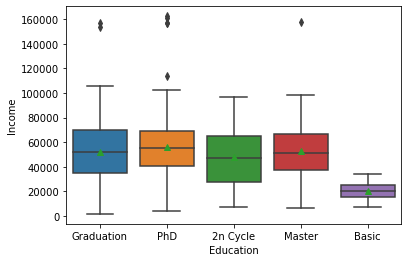

In [14]:
ax = sns.boxplot(x="Education", y="income_float", data=marketing_data_no_outlier_df, showmeans = True)
ax.set(xlabel='Education', ylabel='Income')

As we expected there is a strong correlation between education and income. Lets calculate the average income for each education level and use those values in place of our null values.

Text(0.5, 0, 'Education')

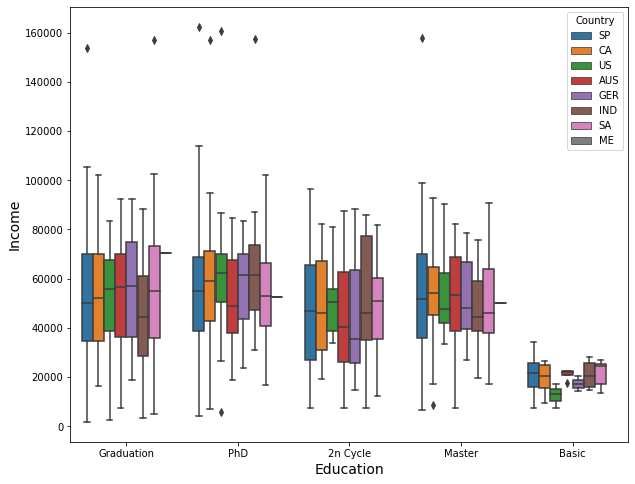

In [15]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Education", y="income_float", hue='Country',data=marketing_data_no_outlier_df)
plt.ylabel("Income", size=14)
plt.xlabel("Education",size=14)

After a quick visual inspection of the boxplot above, we can see that even at a country to country level, the variation in income is both minimal between countries and consistant with the overall trend we saw above. As such, we can choose to ignore this factor and just use education to help fill our null values. 

In [16]:
## First isolate individuals with PhD's, then avg.
phds = marketing_data_no_outlier_df.loc[marketing_data_no_outlier_df['Education'] == 'PhD', ['income_float']]
avg_income_phd = phds.mean()
avg_income_phd = float(avg_income_phd)
avg_income_phd

56145.31392931393

In [17]:
graduation = marketing_data_no_outlier_df.loc[marketing_data_no_outlier_df['Education'] == 'Graduation', ['income_float']]
avg_income_graduation = graduation.mean()
avg_income_graduation = float(avg_income_graduation)
avg_income_graduation

52169.74977578475

In [18]:
twoncycle = marketing_data_no_outlier_df.loc[marketing_data_no_outlier_df['Education'] == '2n Cycle', ['income_float']]
avg_income_2ncycle = twoncycle.mean()
avg_income_2ncycle = float(avg_income_2ncycle)
avg_income_2ncycle

47633.19

In [19]:
master = marketing_data_no_outlier_df.loc[marketing_data_no_outlier_df['Education'] == 'Master', ['income_float']]
avg_income_master = master.mean()
avg_income_master = float(avg_income_master)
avg_income_master

52917.53424657534

In [20]:
basic = marketing_data_no_outlier_df.loc[marketing_data_no_outlier_df['Education'] == 'Basic', ['income_float']]
avg_income_basic = basic.mean()
avg_income_basic = float(avg_income_basic) ##Need to convert to a floating point number
avg_income_basic

20306.25925925926

Now that we have calculated the average for each education level we can go back to our original data frame, 'marketing_data_df' and replace our null income values with the appropriate income values based on education.

In [21]:
##Lets begin with PhD's. 

#phds_with_null_income = marketing_data_df.loc[(marketing_data_df.Education == 'PhD') & (marketing_data_df[' Income '].isna() == True)]
#phds_with_null_income
#marketing_data_df[' Income '].loc[marketing_data_df.loc[(marketing_data_df.Education == 'PhD') & (marketing_data_df[' Income '].isna() == True)]] = avg_income_phd
marketing_data_df = marketing_data_df.rename({' Income ':'Income'}, axis = 1)
phds = (marketing_data_df.Education == 'PhD') & (marketing_data_df.Income.isna())
marketing_data_df['Income'].loc[phds] = avg_income_phd
marketing_data_df.isna().sum()

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 19
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

As we can see above, the number of NA values in our income column has been reduced by 5 from 24 to 19. The null values have been replaced by the average incomes of PhDs (avg_income_phd). We have overwritten the values in our original data frame. Now lets go through and replace the values for the other education levels.

In [22]:
basic = (marketing_data_df.Education == 'Basic') & (marketing_data_df.Income.isna())
marketing_data_df['Income'].loc[basic] = avg_income_basic

master = (marketing_data_df.Education == 'Master') & (marketing_data_df.Income.isna())
marketing_data_df['Income'].loc[master] = avg_income_master

graduation = (marketing_data_df.Education == 'Graduation') & (marketing_data_df.Income.isna())
marketing_data_df['Income'].loc[graduation] = avg_income_graduation

twoncycle = (marketing_data_df.Education == '2n Cycle') & (marketing_data_df.Income.isna())
marketing_data_df['Income'].loc[twoncycle] = avg_income_2ncycle


In [23]:
marketing_data_df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

As we can see above, we have succesfully replaced all of our null values with their respective means and no longer have any null values in our dataframe. Before we deal with our categorical data lets once again clean up our income column and remove the $ and , using the same method we employed earlier. This time, however, we will be operating on our original dataframe.

In [24]:
clean_float = marketing_data_df['Income'].str.replace('$', '').str.replace(',', '').astype(float)
marketing_data_df['Income'] = clean_float
marketing_data_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND


We can also convert our Dt_Customer column into a date and time python can actually interpret.

In [25]:
marketing_data_df['Dt_Customer'] = pd.to_datetime(marketing_data_df['Dt_Customer'])
marketing_data_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND


It may be beneficial to look at age demographics for our data. As such, lets bucket our data into the age demographics, Gen Z, Gen X, Boomers and Up.

In [26]:
marketing_data_df['Age_Demographic'] = 0 ##Using zero as a temporary place holder in order to generate a column. Then we will locate each of the individuals from their respective age_demographic and then append them to this new column.
##Boomers were born before 1964
boomersandup = marketing_data_df.Year_Birth < 1964
marketing_data_df['Age_Demographic'].loc[boomersandup] = 'Boomers and Up'
##Genx after 1965 and up to 1980
genx =  (marketing_data_df.Year_Birth > 1964) & (marketing_data_df.Year_Birth < 1980)
marketing_data_df['Age_Demographic'].loc[genx] = 'Generation X'
##Genz and under anything over 1980
genzandunder = marketing_data_df.Year_Birth > 1980
marketing_data_df['Age_Demographic'].loc[genzandunder] = 'Generation Z and Under'

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [27]:
marketing_data_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age_Demographic
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,...,1,4,4,6,1,0,0,0,0,0,1,0,SP,Generation X
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,...,1,7,3,7,5,0,0,0,0,1,1,0,CA,Boomers and Up
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,...,1,3,2,5,2,0,0,0,0,0,0,0,US,Boomers and Up
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,...,1,1,0,2,7,0,0,0,0,0,0,0,AUS,Generation X
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,...,2,3,1,2,7,1,0,0,0,0,1,0,SP,Generation Z and Under
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,18,126,47,48,...,2,5,2,11,4,0,0,0,0,0,0,0,US,Generation X
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,10,13,3,8,...,1,1,0,3,8,0,0,0,0,0,0,0,SP,Generation X
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,2,88,15,5,...,2,6,1,5,8,0,0,0,0,0,0,0,SP,Generation X
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,38,701,149,165,...,1,5,4,10,3,0,0,0,0,0,0,0,IND,Generation X


Many of our categorical variables have already been One Hot Encoded: AcceptedCmp1-5, Response and Complain. However, we are still left with our newly created Age_Demographic, Education, Marital_Status and Country. Lets implement a Scikit-learn One Hot Encoding solution to speed this along. This solution is 

In [28]:
from sklearn.preprocessing import OneHotEncoder
categorical=['Education', 'Marital_Status','Country']
for items in categorical:
    le=OneHotEncoder()
    t=le.fit_transform(marketing_data_df[[items]]).toarray()
    a=marketing_data_df[items].unique()
    indexs=np.unique(a, return_index=True)[1]
    col=[a[indexs] for index in sorted(indexs)]
    marketing_data_df=pd.concat([marketing_data_df, pd.DataFrame(t, columns=col[1])], axis=1).drop([items],axis=1)

Our above solution assigned boolean values to all except our Age_Demographic column. Upon closer inspection this is due to the fact that python automatically asigned it to have data type: int and OneHotEncoder can only accept floats. Lets change the data type and then use OneHotCoder once again, however, this time we will only be encoding our Age_Demographic column.

In [29]:
marketing_data_df['Age_Demographic'] = marketing_data_df['Age_Demographic'].astype(str)
categorical2 =['Age_Demographic']
for items in categorical2:
    le=OneHotEncoder()
    t=le.fit_transform(marketing_data_df[[items]]).toarray()
    a=marketing_data_df[items].unique()
    indexs=np.unique(a, return_index=True)[1]
    col=[a[indexs] for index in sorted(indexs)]
    marketing_data_df=pd.concat([marketing_data_df, pd.DataFrame(t, columns=col[1])], axis=1).drop([items],axis=1)

In [30]:
pd.set_option('display.max_columns', 50)
marketing_data_df

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,2n Cycle,Basic,Graduation,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO,AUS,CA,GER,IND,ME,SA,SP,US,0,Boomers and Up,Generation X,Generation Z and Under
0,1826,1970,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,1961,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,10476,1958,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1386,1967,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5371,1989,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,66476.0,0,1,2013-03-07,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2236,5263,1977,31056.0,1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2237,22,1976,46310.0,1,0,2012-12-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2238,528,1978,65819.0,0,0,2012-11-29,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


We have now assigned boolean values for all of our categorical data. This can be seen in the final columns of our data table above. Given that we have succesfully replaced all null values, removed significant outliars and assigned boolean values to our categorical data we can move on to our exploratory analysis and visualization.

## Exploratory Analysis and Visualization

In this section we will explore and answer a number of questions relating to customer behavior, demographics, product sales and marketing campaign success.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [33]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [34]:
marketing_data_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,2n Cycle,Basic,Graduation,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO,AUS,CA,GER,IND,ME,SA,SP,US,0,Boomers and Up,Generation X,Generation Z and Under
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,0.090625,0.024107,0.503125,0.165179,0.216964,0.000893,0.001339,0.103571,0.385714,0.214286,0.258929,0.034375,0.000893,0.071429,0.119643,0.053571,0.066071,0.001339,0.150446,0.488839,0.048661,0.036161,0.332143,0.459821,0.171875
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,0.287139,0.153416,0.500102,0.371425,0.412270,0.029874,0.036580,0.304772,0.486872,0.410418,0.438144,0.182231,0.029874,0.257597,0.324616,0.225220,0.248462,0.036580,0.357588,0.499987,0.215206,0.186732,0.471087,0.498494,0.377356
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,1

Before delving deep into our data analysis, lets look at how our data is distributed for some of our more relevant columns. Lets begin with Year_Birth and Income.

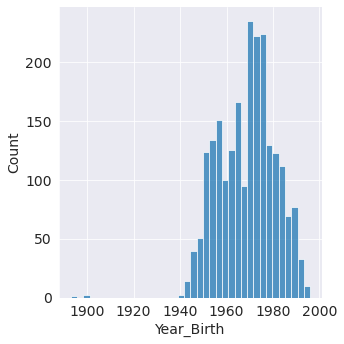

In [35]:
sns.displot(marketing_data_df, x="Year_Birth")

It would appear that we have multiple customers born before 1903 which happens to be the year the oldest person in the world was born. Lets remove these.

In [36]:
oldoutliers = marketing_data_df.loc[marketing_data_df.Year_Birth < 1903]
oldoutliers

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,2n Cycle,Basic,Graduation,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO,AUS,CA,GER,IND,ME,SA,SP,US,0,Boomers and Up,Generation X,Generation Z and Under
513,11004,1893,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
827,1150,1899,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2233,7829,1900,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
##Dropping each of the individuals born before 1903
marketing_data_df = marketing_data_df.drop(index = 513)
marketing_data_df = marketing_data_df.drop(index = 827)
marketing_data_df = marketing_data_df.drop(index = 2233)

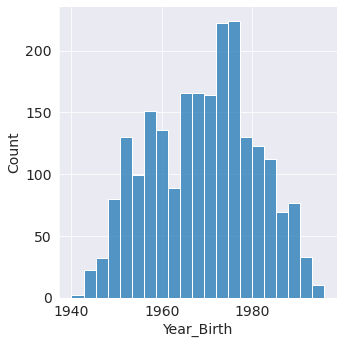

In [38]:
sns.displot(marketing_data_df, x="Year_Birth")

As we can see from the plot above, our birth year appears to follow a normal distribution as we would expect. Lets look at income now.

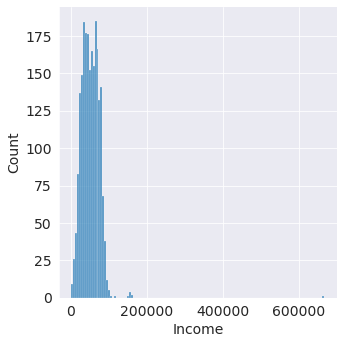

In [39]:
sns.displot(marketing_data_df, x="Income")

Our data appears to be normal, however, we need to once again remove the outliar making 600,000$.

In [40]:
incomeoutliers = marketing_data_df.loc[marketing_data_df.Income > 600000]
incomeoutliers

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,2n Cycle,Basic,Graduation,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO,AUS,CA,GER,IND,ME,SA,SP,US,0,Boomers and Up,Generation X,Generation Z and Under
527,9432,1977,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
marketing_data_df = marketing_data_df.drop(index = 527)

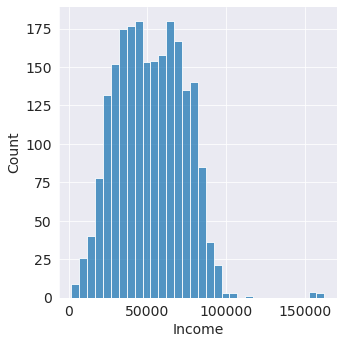

In [42]:
sns.displot(marketing_data_df, x="Income")

As expected after removing our outlier we have a fairly normal distribution of income. The few individuals making more than 150,000, while not necesarily outliars do skew our distribution slightly. As such, we will keep a close eye on them in our statistical analysis. Lets look at which countries are customers live in. As a result of our one hot encoding we will need to sum each column first.

In [43]:
marketing_data_df

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,2n Cycle,Basic,Graduation,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO,AUS,CA,GER,IND,ME,SA,SP,US,0,Boomers and Up,Generation X,Generation Z and Under
0,1826,1970,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,1961,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,10476,1958,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1386,1967,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5371,1989,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,66476.0,0,1,2013-03-07,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2236,5263,1977,31056.0,1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2237,22,1976,46310.0,1,0,2012-12-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2238,528,1978,65819.0,0,0,2012-11-29,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
austot = marketing_data_df['AUS'].sum()
catot = marketing_data_df['CA'].sum()
gertot = marketing_data_df['GER'].sum()
indtot = marketing_data_df['IND'].sum()
metot = marketing_data_df['ME'].sum()
satot = marketing_data_df['SA'].sum()
sptot = marketing_data_df['SP'].sum()
ustot = marketing_data_df['US'].sum()

countrytot = [austot, catot, gertot, indtot, metot, satot, sptot, ustot]
countries = ['AUS', 'CA', 'GER', 'IND', 'ME', 'SA', 'SP', 'US']

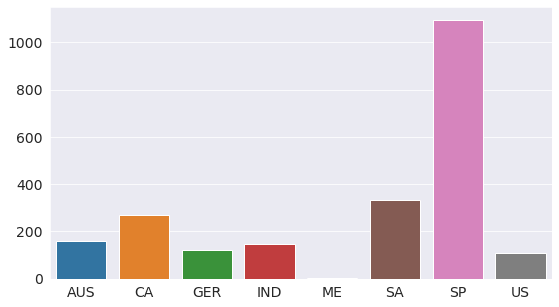

In [45]:
ax = sns.barplot(x=countries, y=countrytot)

The vast majority of the customer base hails from Spain, having over three times more representation than any other market.

## What factors are significantly related to the number of store purchases?
Lets begin by looking at how each of our variables correlate with the number of store purchases.

In [46]:
marketing_data_df.corr()['NumStorePurchases']

ID                       -0.013613
Year_Birth               -0.139237
Income                    0.631424
Kidhome                  -0.500192
Teenhome                  0.050177
Recency                   0.000771
MntWines                  0.642313
MntFruits                 0.463136
MntMeatProducts           0.479983
MntFishProducts           0.459997
MntSweetProducts          0.448673
MntGoldProds              0.383124
NumDealsPurchases         0.068418
NumWebPurchases           0.502227
NumCatalogPurchases       0.518788
NumStorePurchases         1.000000
NumWebVisitsMonth        -0.429857
AcceptedCmp3             -0.068108
AcceptedCmp4              0.179068
AcceptedCmp5              0.216079
AcceptedCmp1              0.182975
AcceptedCmp2              0.085067
Response                  0.038702
Complain                 -0.011563
2n Cycle                 -0.024494
Basic                    -0.142474
Graduation                0.011320
Master                    0.013930
PhD                 

It appears that we have a few variables with reasonably high correlations. Lets constrain our data to just these variables.

In [47]:
marketing_data_df.corr().loc[marketing_data_df.corr().NumStorePurchases > .4]['NumStorePurchases']

Income                 0.631424
MntWines               0.642313
MntFruits              0.463136
MntMeatProducts        0.479983
MntFishProducts        0.459997
MntSweetProducts       0.448673
NumWebPurchases        0.502227
NumCatalogPurchases    0.518788
NumStorePurchases      1.000000
Name: NumStorePurchases, dtype: float64

Obviously we are going to see the number of store purchases correlate highly to the products being sold. MntWines has a particularly high correlation, however. The main takeaway here is that Income is highly correlated with the amount of in store purchases. Certainly, this makes intuitive sense as a greater disposable income provides more spending power and likely an increased willingness to do so. Lets look at variables with a significant negative correlation to see if there is any link between them and income.

In [48]:
marketing_data_df.corr().loc[marketing_data_df.corr().NumStorePurchases < -.4]['NumStorePurchases']

Kidhome             -0.500192
NumWebVisitsMonth   -0.429857
Name: NumStorePurchases, dtype: float64

This is an interesting result. Having kids at home is negatively correlated with making in store purchases. Perhaps this is due to the fact that children can be difficult to bring to the store. It is strange that the number of web visits in a given month is negatively correlated with in store purchases while the number of web purchases is positively correlated. One would expect consistency between these two variables. Lets look at the correlation between instore purchases and income now.

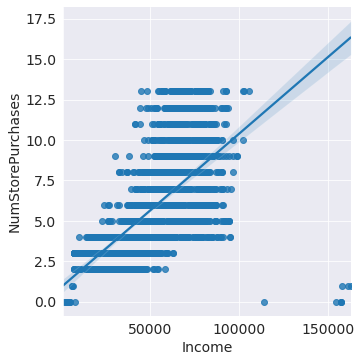

In [49]:
ax = sns.lmplot(x = 'Income', y = 'NumStorePurchases', data = marketing_data_df)

It appears that the individuals with incomes greater than 110000 are skewing our distribution. We made a note to keep an eye on these potential outliers earlier. Lets remove these values and replot our data.

In [50]:
incomeoutliers = marketing_data_df.loc[marketing_data_df.Income > 110000]
incomeoutliers

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,2n Cycle,Basic,Graduation,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO,AUS,CA,GER,IND,ME,SA,SP,US,0,Boomers and Up,Generation X,Generation Z and Under
210,4619,1945,113734.0,0,0,2014-05-28,9,6,2,3,1,262,3,0,27,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
325,4931,1977,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
497,1501,1982,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
731,1503,1976,162397.0,1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
853,5336,1971,157733.0,1,0,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1826,5555,1975,153924.0,0,0,2014-02-07,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1925,11181,1949,156924.0,0,0,2013-08-29,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2204,8475,1973,157243.0,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
marketing_data_df = marketing_data_df.drop(index = 210)
marketing_data_df = marketing_data_df.drop(index = 325)
marketing_data_df = marketing_data_df.drop(index = 497)
marketing_data_df = marketing_data_df.drop(index = 731)
marketing_data_df = marketing_data_df.drop(index = 853)
marketing_data_df = marketing_data_df.drop(index = 1826)
marketing_data_df = marketing_data_df.drop(index = 1925)
marketing_data_df = marketing_data_df.drop(index = 2204)

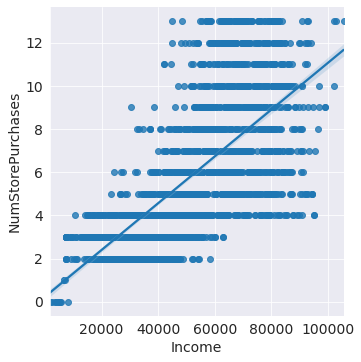

In [52]:
ax = sns.lmplot(x = 'Income', y = 'NumStorePurchases', data = marketing_data_df)

There is clearly a positive relationship between income and the number of in store purchases. Lets look at some of our other relvent factors: kids at home, number of web visits and MntWines.

<AxesSubplot:xlabel='Kidhome', ylabel='NumStorePurchases'>

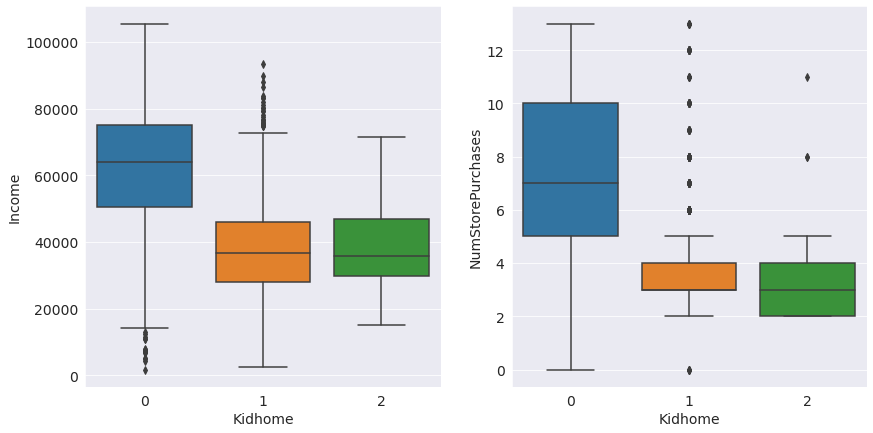

In [53]:
fig, axs=plt.subplots(1,2, figsize=(14,7))
sns.boxplot(x='Kidhome',y='Income', data=marketing_data_df, ax=axs[0])
sns.boxplot(x='Kidhome',y='NumStorePurchases', data=marketing_data_df, ax=axs[1])

The relationship between kids at home, income and the number of store purchases becomes much more clear now. The difference in income betweens households with 0 and 1 children is considerable. We demonstrated previously that income is positively correlated with in store purchases. Hence, it makes sense that since having more than one child at home has a considerable decrease in income we see a singificant negative correlation between children at home and in store purchases.

[Text(0.5, 0, 'MntWines'), Text(0, 0.5, 'Number of Store Purchases')]

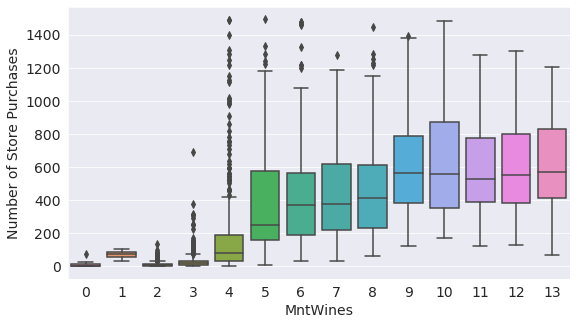

In [54]:
ax = sns.boxplot(x="NumStorePurchases", y="MntWines", data=marketing_data_df)
ax.set(xlabel='MntWines', ylabel='Number of Store Purchases')

Unsurprisingly alcohol sales are particularly lucrative and the amount of wine purchased has a positive correlation with the number of in store pruchases. This makes sense given alochol in large part is far more difficult to sell online, thus, in person sales remain the primary means of sales.

## Conclusions
Through our statistical analysis we have found that Income, Amount of Wine Purchased, and the number of children at home are the greatest factors influencing in person sales. Income and the amount of wine purchased both positively correlated with the number of in store purchases whereas having children at home had a considerable negative correlation with the number of in store purchases.

## How does the US rank in terms of total purchases?

In order to evaluate how the US ranks in terms of total purchases we need to first create a new category that will sum each customers purchases.

In [55]:
marketing_data_df['Total_Purchases'] = marketing_data_df['NumDealsPurchases'] + marketing_data_df['NumWebPurchases'] + marketing_data_df['NumCatalogPurchases'] + marketing_data_df['NumStorePurchases'] + marketing_data_df['MntWines'] + marketing_data_df['MntFruits'] + marketing_data_df['MntFishProducts'] + marketing_data_df['MntMeatProducts'] + marketing_data_df['MntSweetProducts'] + marketing_data_df['MntGoldProds']

In [56]:
marketing_data_df

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,...,Basic,Graduation,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO,AUS,CA,GER,IND,ME,SA,SP,US,0,Boomers and Up,Generation X,Generation Z and Under,Total_Purchases
0,1826,1970,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1205
1,1,1961,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,595
2,10476,1958,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,262
3,1386,1967,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15
4,5371,1989,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,66476.0,0,1,2013-03-07,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,709
2236,5263,1977,31056.0,1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,60
2237,22,1976,46310.0,1,0,2012-12-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,323
2238,528,1978,65819.0,0,0,2012-11-29,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1403


As we can see we have succesfully created a new column, 'Total_Purchases', that sums across all of our various store fronts the total number of customer purchases. Lets plot our data and see how the US faires.

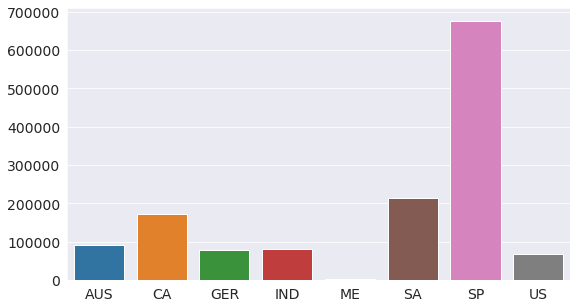

In [57]:
auspurchasetot = marketing_data_df['Total_Purchases'].loc[marketing_data_df['AUS'] == 1.0].sum()
capurchasetot = marketing_data_df['Total_Purchases'].loc[marketing_data_df['CA'] == 1.0].sum()
gerpurchasetot = marketing_data_df['Total_Purchases'].loc[marketing_data_df['GER'] == 1.0].sum()
indpurchasetot = marketing_data_df['Total_Purchases'].loc[marketing_data_df['IND'] == 1.0].sum()
mepurchasetot = marketing_data_df['Total_Purchases'].loc[marketing_data_df['ME'] == 1.0].sum()
sapurchasetot = marketing_data_df['Total_Purchases'].loc[marketing_data_df['SA'] == 1.0].sum()
sppurchasetot = marketing_data_df['Total_Purchases'].loc[marketing_data_df['SP'] == 1.0].sum()
uspurchasetot = marketing_data_df['Total_Purchases'].loc[marketing_data_df['US'] == 1.0].sum()

countries = ['AUS', 'CA', 'GER', 'IND', 'ME', 'SA', 'SP', 'US']
purchasetotals = [auspurchasetot, capurchasetot, gerpurchasetot, indpurchasetot, mepurchasetot, sapurchasetot, sppurchasetot, uspurchasetot]

ax = sns.barplot(x=countries, y=purchasetotals)


Unsurprisingly the total number of purchases by country very closely resembles our plot of the total number of customers from each country. Lets divide our total number of purchases by the number of customers from each country to see if there's any more to this.

In [58]:
from operator import truediv
##We can quickly divide our two lists elementwise by using truediv
purchasetotalsperpopulation = list(map(truediv, purchasetotals, countrytot))
purchasetotalsperpopulation

[575.48125,
 644.1231343283582,
 639.175,
 543.3197278911565,
 1060.3333333333333,
 639.7940298507463,
 617.8473491773309,
 622.7706422018349]

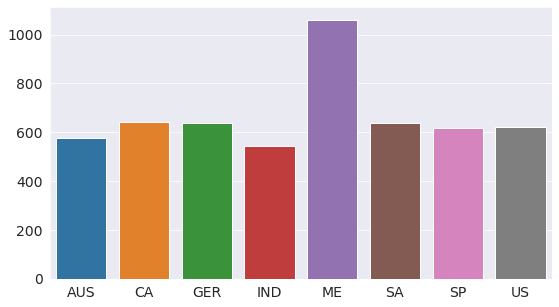

In [59]:
ax = sns.barplot(x=countries, y=purchasetotalsperpopulation)

This plot with the total sales per country population tells us a more complete story. While the US ranks quite low in terms of total sales, when we evaluate how the US is doing relative to the total number of customers the result is consistant with those of all other countries with the exception of ME.

In [60]:
## Number of customers from ME
marketing_data_df['ME'].sum()

3.0

## Conclusions
While the US considerably underperforms in total sales when compared directly to other countries, if we consider the number of customers from each country the US is consistantly producing the same number of total sales per customer as in other countries with the exception of ME. We can discount ME as somewhat of an outlier as only 3 of our customers reside in ME thus skewing their total purchases to be much higher.

## What is the relationship between geographical region and success of a campaign?

In [61]:
## Campaign one success by country
auscampaignonetot = marketing_data_df['AcceptedCmp1'].loc[marketing_data_df['AUS'] == 1.0].sum()
cacampaignonetot = marketing_data_df['AcceptedCmp1'].loc[marketing_data_df['CA'] == 1.0].sum()
gercampaignonetot = marketing_data_df['AcceptedCmp1'].loc[marketing_data_df['GER'] == 1.0].sum()
indcampaignonetot = marketing_data_df['AcceptedCmp1'].loc[marketing_data_df['IND'] == 1.0].sum()
mecampaignonetot = marketing_data_df['AcceptedCmp1'].loc[marketing_data_df['ME'] == 1.0].sum()
sacampaignonetot = marketing_data_df['AcceptedCmp1'].loc[marketing_data_df['SA'] == 1.0].sum()
spcampaignonetot = marketing_data_df['AcceptedCmp1'].loc[marketing_data_df['SP'] == 1.0].sum()
uscampaignonetot = marketing_data_df['AcceptedCmp1'].loc[marketing_data_df['US'] == 1.0].sum()

## Campaign two success by country
auscampaigntwotot = marketing_data_df['AcceptedCmp2'].loc[marketing_data_df['AUS'] == 1.0].sum()
cacampaigntwotot = marketing_data_df['AcceptedCmp2'].loc[marketing_data_df['CA'] == 1.0].sum()
gercampaigntwotot = marketing_data_df['AcceptedCmp2'].loc[marketing_data_df['GER'] == 1.0].sum()
indcampaigntwotot = marketing_data_df['AcceptedCmp2'].loc[marketing_data_df['IND'] == 1.0].sum()
mecampaigntwotot = marketing_data_df['AcceptedCmp2'].loc[marketing_data_df['ME'] == 1.0].sum()
sacampaigntwotot = marketing_data_df['AcceptedCmp2'].loc[marketing_data_df['SA'] == 1.0].sum()
spcampaigntwotot = marketing_data_df['AcceptedCmp2'].loc[marketing_data_df['SP'] == 1.0].sum()
uscampaigntwotot = marketing_data_df['AcceptedCmp2'].loc[marketing_data_df['US'] == 1.0].sum()

## Campaign three success by country
auscampaignthreetot = marketing_data_df['AcceptedCmp3'].loc[marketing_data_df['AUS'] == 1.0].sum()
cacampaignthreetot = marketing_data_df['AcceptedCmp3'].loc[marketing_data_df['CA'] == 1.0].sum()
gercampaignthreetot = marketing_data_df['AcceptedCmp3'].loc[marketing_data_df['GER'] == 1.0].sum()
indcampaignthreetot = marketing_data_df['AcceptedCmp3'].loc[marketing_data_df['IND'] == 1.0].sum()
mecampaignthreetot = marketing_data_df['AcceptedCmp3'].loc[marketing_data_df['ME'] == 1.0].sum()
sacampaignthreetot = marketing_data_df['AcceptedCmp3'].loc[marketing_data_df['SA'] == 1.0].sum()
spcampaignthreetot = marketing_data_df['AcceptedCmp3'].loc[marketing_data_df['SP'] == 1.0].sum()
uscampaignthreetot = marketing_data_df['AcceptedCmp3'].loc[marketing_data_df['US'] == 1.0].sum()

## Campaign four success by country
auscampaignfourtot = marketing_data_df['AcceptedCmp4'].loc[marketing_data_df['AUS'] == 1.0].sum()
cacampaignfourtot = marketing_data_df['AcceptedCmp4'].loc[marketing_data_df['CA'] == 1.0].sum()
gercampaignfourtot = marketing_data_df['AcceptedCmp4'].loc[marketing_data_df['GER'] == 1.0].sum()
indcampaignfourtot = marketing_data_df['AcceptedCmp4'].loc[marketing_data_df['IND'] == 1.0].sum()
mecampaignfourtot = marketing_data_df['AcceptedCmp4'].loc[marketing_data_df['ME'] == 1.0].sum()
sacampaignfourtot = marketing_data_df['AcceptedCmp4'].loc[marketing_data_df['SA'] == 1.0].sum()
spcampaignfourtot = marketing_data_df['AcceptedCmp4'].loc[marketing_data_df['SP'] == 1.0].sum()
uscampaignfourtot = marketing_data_df['AcceptedCmp4'].loc[marketing_data_df['US'] == 1.0].sum()

## Campaign five success by country
auscampaignfivetot = marketing_data_df['AcceptedCmp5'].loc[marketing_data_df['AUS'] == 1.0].sum()
cacampaignfivetot = marketing_data_df['AcceptedCmp5'].loc[marketing_data_df['CA'] == 1.0].sum()
gercampaignfivetot = marketing_data_df['AcceptedCmp5'].loc[marketing_data_df['GER'] == 1.0].sum()
indcampaignfivetot = marketing_data_df['AcceptedCmp5'].loc[marketing_data_df['IND'] == 1.0].sum()
mecampaignfivetot = marketing_data_df['AcceptedCmp5'].loc[marketing_data_df['ME'] == 1.0].sum()
sacampaignfivetot = marketing_data_df['AcceptedCmp5'].loc[marketing_data_df['SA'] == 1.0].sum()
spcampaignfivetot = marketing_data_df['AcceptedCmp5'].loc[marketing_data_df['SP'] == 1.0].sum()
uscampaignfivetot = marketing_data_df['AcceptedCmp5'].loc[marketing_data_df['US'] == 1.0].sum()

In [62]:
extendedcountries = ['AUS1', 'CA1', 'GER1', 'IND1', 'ME1', 'SA1', 'SP1', 'US1', 'AUS2', 'CA2', 'GER2', 'IND2', 'ME2', 'SA2', 'SP2', 'US2', 'AUS3', 'CA3', 'GER3', 'IND3', 'ME3', 'SA3', 'SP3', 'US3', 'AUS4', 'CA4', 'GER4', 'IND4', 'ME4', 'SA4', 'SP4', 'US4', 'AUS5', 'CA5', 'GER5', 'IND5', 'ME5', 'SA5', 'SP5', 'US5']
campaignsuccess = [auscampaignonetot, cacampaignonetot, gercampaignonetot, indcampaignonetot, mecampaignonetot, sacampaignonetot, spcampaignonetot, uscampaignonetot, auscampaigntwotot, cacampaigntwotot, gercampaigntwotot, indcampaigntwotot, mecampaigntwotot, sacampaigntwotot, spcampaigntwotot, uscampaigntwotot, auscampaignthreetot, cacampaignthreetot, gercampaignthreetot, indcampaignthreetot, mecampaignthreetot, sacampaignthreetot, spcampaignthreetot, uscampaignthreetot, auscampaignfourtot, cacampaignfourtot, gercampaignfourtot, indcampaignfourtot, mecampaignfourtot, sacampaignfourtot, spcampaignfourtot, uscampaignfourtot, auscampaignfivetot, cacampaignfivetot, gercampaignfivetot, indcampaignfivetot, mecampaignfivetot, sacampaignfivetot, spcampaignfivetot, uscampaignfivetot]
auscampaigns = [auscampaignonetot, auscampaigntwotot, auscampaignthreetot, auscampaignfourtot, auscampaignfivetot]
cacampaigns = [cacampaignonetot, cacampaigntwotot, cacampaignthreetot, cacampaignfourtot, cacampaignfivetot]
gercampaigns = [gercampaignonetot, gercampaigntwotot, gercampaignthreetot, gercampaignfourtot, gercampaignfivetot]
indcampaigns = [indcampaignonetot, indcampaigntwotot, indcampaignthreetot, indcampaignfourtot, indcampaignfivetot]
mecampaigns = [mecampaignonetot, mecampaigntwotot, mecampaignthreetot, mecampaignfourtot, mecampaignfivetot]
sacampaigns = [sacampaignonetot, sacampaigntwotot, sacampaignthreetot, sacampaignfourtot, sacampaignfivetot]
spcampaigns = [spcampaignonetot, spcampaigntwotot, spcampaignthreetot, spcampaignfourtot, spcampaignfivetot]
uscampaigns = [uscampaignonetot, uscampaigntwotot, uscampaignthreetot, uscampaignfourtot, uscampaignfivetot]
## Seaborn doesn't like having the same axis labels
campaigns1 = ['Aus Campaign 1', 'Aus Campaign 2', 'Aus Campaign 3', 'Aus Campaign 4', 'Aus Campaign 5']
campaigns2 = ['CA Campaign 1', 'CA Campaign 2', 'CA Campaign 3', 'CA Campaign 4', 'CA Campaign 5']
campaigns3 = ['GER Campaign 1', 'GER Campaign 2', 'GER Campaign 3', 'GER Campaign 4', 'GER Campaign 5']
campaigns4 = ['IND Campaign 1', 'IND Campaign 2', 'IND Campaign 3', 'IND Campaign 4', 'IND Campaign 5']
campaigns5 = ['ME Campaign 1', 'ME Campaign 2', 'ME Campaign 3', 'ME Campaign 4', 'ME Campaign 5']
campaigns6 = ['SA Campaign 1', 'SA Campaign 2', 'SA Campaign 3', 'SA Campaign 4', 'SA Campaign 5']
campaigns7 = ['SP Campaign 1', 'SP Campaign 2', 'SP Campaign 3', 'SP Campaign 4', 'SP Campaign 5']
campaigns8 = ['US Campaign 1', 'US Campaign 2', 'US Campaign 3', 'US Campaign 4', 'US Campaign 5']




In [63]:
campaigns = ['Cmp 1', 'Cmp 2', 'Cmp 3', 'Cmp 4', 'Cmp 5']

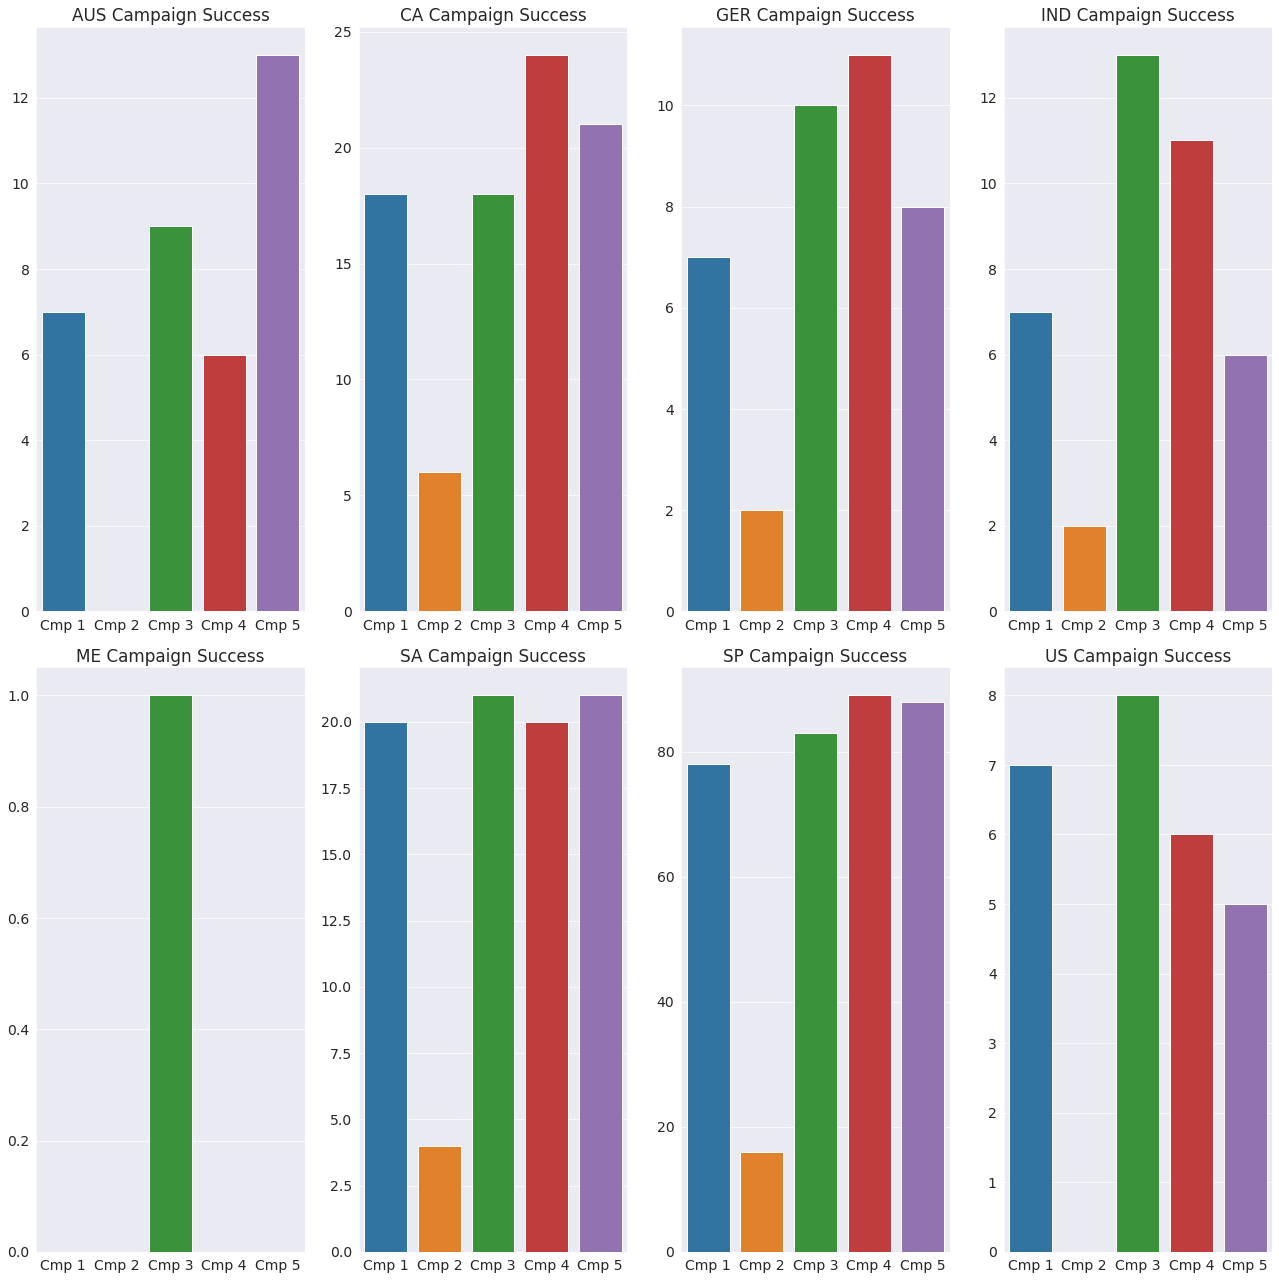

In [64]:
fig, axs = plt.subplots(2,4, figsize=(18,18), sharey = False)

'''sns.barplot(ax = axs[0][0], x=extendedcountries, y=campaignsuccess)
sns.barplot(ax = axs[0][1], x=campaigns1, y=auscampaigns)
sns.barplot(ax = axs[0][2], x=campaigns2, y=cacampaigns)
sns.barplot(ax = axs[1][0], x=campaigns3, y=gercampaigns)
sns.barplot(ax = axs[1][1], x=campaigns4, y=indcampaigns)
sns.barplot(ax = axs[1][2], x=campaigns5, y=mecampaigns)
sns.barplot(ax = axs[2][0], x=campaigns6, y=sacampaigns)
sns.barplot(ax = axs[2][1], x=campaigns7, y=spcampaigns)
sns.barplot(ax = axs[2][2], x=campaigns8, y=uscampaigns)'''

sns.barplot(ax = axs[0][0], x=campaigns, y=auscampaigns)
axs[0][0].set_title('AUS Campaign Success')
sns.barplot(ax = axs[0][1], x=campaigns, y=cacampaigns)
axs[0][1].set_title('CA Campaign Success')
sns.barplot(ax = axs[0][2], x=campaigns, y=gercampaigns)
axs[0][2].set_title('GER Campaign Success')
sns.barplot(ax = axs[0][3], x=campaigns, y=indcampaigns)
axs[0][3].set_title('IND Campaign Success')
sns.barplot(ax = axs[1][0], x=campaigns, y=mecampaigns)
axs[1][0].set_title('ME Campaign Success')
sns.barplot(ax = axs[1][1], x=campaigns, y=sacampaigns)
axs[1][1].set_title('SA Campaign Success')
sns.barplot(ax = axs[1][2], x=campaigns, y=spcampaigns)
axs[1][2].set_title('SP Campaign Success')
sns.barplot(ax = axs[1][3], x=campaigns, y=uscampaigns)
axs[1][3].set_title('US Campaign Success')


plt.tight_layout()    
plt.show()

## Conclusions
It appears that campaigns 1,3,4 and 5 all have similar efficacies across countries. Specific campaigns had slightly more success in different regions. For instance, campaign 4 appears to be particularly sucessful for Spain, Canada and Germany. Campaign 5 was the most effective in AUS. Campaign 3 did extremely well in US, SA and IND. Certainly the most clear take away is that campaign 2 was particularly unsuccesful across the board. Depending on the geographical market of interest we would make different recommendations as to which campaigns to emmulate. 

## What does the average customer look like?

In [65]:
marketing_data_df.mean()

<ipython-input-65-9d827113a12c>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  marketing_data_df.mean()


ID                         5589.731598
Year_Birth                 1968.899461
Income                    51593.913339
Kidhome                       0.444794
Teenhome                      0.507630
Recency                      49.124327
MntWines                    305.125673
MntFruits                    26.359515
MntMeatProducts             165.356822
MntFishProducts              37.658887
MntSweetProducts             27.056104
MntGoldProds                 44.131508
NumDealsPurchases             2.320916
NumWebPurchases               4.089767
NumCatalogPurchases           2.637792
NumStorePurchases             5.815081
NumWebVisitsMonth             5.336176
AcceptedCmp3                  0.073160
AcceptedCmp4                  0.074955
AcceptedCmp5                  0.072711
AcceptedCmp1                  0.064632
AcceptedCmp2                  0.013465
Response                      0.149910
Complain                      0.008977
2n Cycle                      0.090215
Basic                    

## Our average customer lives in Spain, has 0 kids, a graduation education and were born in the year 1969. They have an income of 51,593 USD and have made 620 total purchases

## Which products are most succesful?

In [66]:
products = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
winesum = marketing_data_df.MntWines.sum()
fruitsum = marketing_data_df.MntFruits.sum()
meatsum = marketing_data_df.MntMeatProducts.sum()
fishsum = marketing_data_df.MntFishProducts.sum()
sweetsum = marketing_data_df.MntSweetProducts.sum()
goldsum = marketing_data_df.MntGoldProds.sum()
productsums = [winesum, fruitsum, meatsum, fishsum, sweetsum, goldsum]

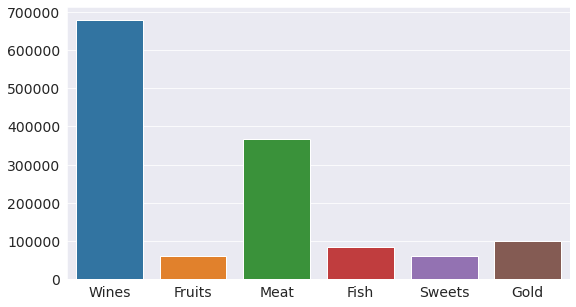

In [67]:
ax = sns.barplot(x=products, y=productsums)

## Conclusions
As we can see, wine sales are by far the most succesful products with Meat generating about half as many sales. The other products, fruits, fish, sweets, and gold all perform fairly similarly with gold just edging out the other three. Their contribution to overall sales, however, is miniscule in comparison to wines and meat.

# Summary
-Our average customer lives in Spain, has 0 kids, a graduation education and was born in the year 1969. They have an income of 51,593 USD and have made 620 total purchases. 

-The three primary factors relating to the number of in store purchases are Income, wine consumption and the number of children at home. Customers with children at home are over 60% less likely to make in store purchases. 

-While the US is about comperable to other countries in terms of purchases per customer it ranks second to last in terms of overall purchases. 

-Campaign 4 yielded the best results in Canada, Germany and Spain. Conversely in the US, SA and IND campaign 3 performed best. Campaign 2 performed the worst across all countries.

-Wine nearly generates the same number of sales as all other products combine. Meat produces about half that of wine and the other products (fish, gold, fruits, and sweets) all produce less than a quarter of what meat produces.